## Fire Weather Index (FWI) Prediction for Algerian Forest Fires using Multiple Linear Regression

In [2]:
#importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv(r"C:\Users\mihir\Downloads\FWI_Predictor_ML-main\FWI_Predictor_ML-main\dataset\Algerian_forest_fires_cleaned_dataset.csv", header=1)

In [12]:
df.head()

,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4.1,0.5,not fire,0
0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
1,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
3,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
4,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   1         242 non-null    int64  
 1   6         242 non-null    int64  
 2   2012      242 non-null    int64  
 3   29        242 non-null    int64  
 4   57        242 non-null    int64  
 5   18        242 non-null    int64  
 6   0.0       242 non-null    float64
 7   65.7      242 non-null    float64
 8   3.4       242 non-null    float64
 9   7.6       242 non-null    float64
 10  1.3       242 non-null    float64
 11  3.4.1     242 non-null    float64
 12  0.5       242 non-null    float64
 13  not fire  242 non-null    object 
 14  0         242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


## Data Cleaning

In [17]:
#missing values
df[df.isnull().any(axis=1)]

,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4.1,0.5,not fire,0


In [20]:
df.loc[:122,"Region"] = 0
df.loc[122:,"Region"] = 1

In [22]:
df["Region"]=df["Region"].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   1         242 non-null    int64  
 1   6         242 non-null    int64  
 2   2012      242 non-null    int64  
 3   29        242 non-null    int64  
 4   57        242 non-null    int64  
 5   18        242 non-null    int64  
 6   0.0       242 non-null    float64
 7   65.7      242 non-null    float64
 8   3.4       242 non-null    float64
 9   7.6       242 non-null    float64
 10  1.3       242 non-null    float64
 11  3.4.1     242 non-null    float64
 12  0.5       242 non-null    float64
 13  not fire  242 non-null    object 
 14  0         242 non-null    int64  
 15  Region    242 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 30.4+ KB


In [26]:
df.iloc[120:124]

,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4.1,0.5,not fire,0,Region
120,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,0,0
121,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1,0
122,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1,1
123,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1,1


In [28]:
#removing 123 row
df = df.drop(123).reset_index(drop = True)

In [30]:
df.iloc[120:124]

,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4.1,0.5,not fire,0,Region
120,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,0,0
121,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1,0
122,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1,1
123,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,1,1


In [32]:
df.isnull().sum()

1           0
6           0
2012        0
29          0
57          0
18          0
0.0         0
65.7        0
3.4         0
7.6         0
1.3         0
3.4.1       0
0.5         0
not fire    0
0           0
Region      0
dtype: int64

In [34]:
#droping the row of missing values
df = df.dropna().reset_index(drop=True)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   1         241 non-null    int64  
 1   6         241 non-null    int64  
 2   2012      241 non-null    int64  
 3   29        241 non-null    int64  
 4   57        241 non-null    int64  
 5   18        241 non-null    int64  
 6   0.0       241 non-null    float64
 7   65.7      241 non-null    float64
 8   3.4       241 non-null    float64
 9   7.6       241 non-null    float64
 10  1.3       241 non-null    float64
 11  3.4.1     241 non-null    float64
 12  0.5       241 non-null    float64
 13  not fire  241 non-null    object 
 14  0         241 non-null    int64  
 15  Region    241 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 30.3+ KB


In [38]:
df.head()

,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4.1,0.5,not fire,0,Region
0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0
1,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0
3,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0
4,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0,0


In [40]:
# Listing out column names to check
df.columns

Index(['1', '6', '2012', '29', '57', '18', '0.0', '65.7', '3.4', '7.6', '1.3',
       '3.4.1', '0.5', 'not fire', '0', 'Region'],
      dtype='object')

In [42]:
# Spaces were fixed in the column names
df.columns = df.columns.str.strip()

In [44]:
df.columns

Index(['1', '6', '2012', '29', '57', '18', '0.0', '65.7', '3.4', '7.6', '1.3',
       '3.4.1', '0.5', 'not fire', '0', 'Region'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   1         241 non-null    int64  
 1   6         241 non-null    int64  
 2   2012      241 non-null    int64  
 3   29        241 non-null    int64  
 4   57        241 non-null    int64  
 5   18        241 non-null    int64  
 6   0.0       241 non-null    float64
 7   65.7      241 non-null    float64
 8   3.4       241 non-null    float64
 9   7.6       241 non-null    float64
 10  1.3       241 non-null    float64
 11  3.4.1     241 non-null    float64
 12  0.5       241 non-null    float64
 13  not fire  241 non-null    object 
 14  0         241 non-null    int64  
 15  Region    241 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 30.3+ KB


In [51]:
print(df.columns)


Index(['1', '6', '2012', '29', '57', '18', '0.0', '65.7', '3.4', '7.6', '1.3',
       '3.4.1', '0.5', 'not fire', '0', 'Region'],
      dtype='object')


In [53]:
# Define correct column headers (adjust these based on the dataset structure)
headers = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 
           'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']

In [57]:
df = pd.read_csv(
    r"C:\Users\mihir\Downloads\FWI_Predictor_ML-main\FWI_Predictor_ML-main\dataset\Algerian_forest_fires_cleaned_dataset.csv",
    header=None,  # This prevents pandas from treating the first row as column headers
    names=headers  # Assigns the specified headers to the DataFrame
)

In [63]:
import pandas as pd

# Load the dataset, skipping the first row
df = pd.read_csv(
    r"C:\Users\mihir\Downloads\FWI_Predictor_ML-main\FWI_Predictor_ML-main\dataset\Algerian_forest_fires_cleaned_dataset.csv",
    header=1  # Skip the first row and use the second row as the column headers
)

# Display the first few rows of the DataFrame
print(df.head())


   1  6  2012  29  57  18   0.0  65.7  3.4   7.6  1.3  3.4.1  0.5  not fire  0
0  2  6  2012  29  61  13   1.3  64.4  4.1   7.6  1.0    3.9  0.4  not fire  0
1  3  6  2012  26  82  22  13.1  47.1  2.5   7.1  0.3    2.7  0.1  not fire  0
2  4  6  2012  25  89  13   2.5  28.6  1.3   6.9  0.0    1.7  0.0  not fire  0
3  5  6  2012  27  77  16   0.0  64.8  3.0  14.2  1.2    3.9  0.5  not fire  0
4  6  6  2012  31  67  14   0.0  82.6  5.8  22.2  3.1    7.0  2.5      fire  0


In [65]:
# Define the correct column names
correct_columns = [
    "day", "month", "year", "Temperature", "RH", "Ws", "Rain", "FFMC",
    "DMC", "DC", "ISI", "BUI", "FWI", "Classes", "Region"
]

# Apply the column names to the DataFrame
df.columns = correct_columns


In [67]:
# Convert numeric columns to integers or floats as needed
df[["day", "month", "year", "Temperature", "RH", "Ws", "Region"]] = df[["day", "month", "year", "Temperature", "RH", "Ws", "Region"]].astype(int)

df[["Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]] = df[["Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]].astype(float)

# Check the result
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB
None


In [69]:
print(df.columns)


Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [71]:
# Convert columns to integer
df[["day", "month", "year", "Temperature", "RH", "Ws", "Region"]] = df[["day", "month", "year", "Temperature", "RH", "Ws", "Region"]].astype(int)

# Convert columns to float
df[["Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]] = df[["Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]].astype(float)

# Verify the changes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB
None


In [75]:
for column in ["day", "month", "year", "Temperature", "RH", "Ws", "Region", "Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]:
    non_numeric = df[pd.to_numeric(df[column], errors='coerce').isna()]
    if not non_numeric.empty:
        print(f"Non-numeric values in column '{column}':")
        print(non_numeric)



In [77]:
df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert non-numeric to NaN
df[column].fillna(df[column].mean(), inplace=True)  # Replace NaN with the column mean


C:\Users\mihir\AppData\Local\Temp\ipykernel_23524\2080217432.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)  # Replace NaN with the column mean


In [79]:
df[["day", "month", "year", "Temperature", "RH", "Ws", "Region"]] = df[["day", "month", "year", "Temperature", "RH", "Ws", "Region"]].astype(int)
df[["Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]] = df[["Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]].astype(float)


In [81]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB
None
   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    2      6  2012           29  61

In [83]:
#Changing the other columns to Float data type
column_obj = [col for col in df.columns if df[col].dtype=='O']
for col in column_obj:
    if col != "Classes":
        df[col] = df[col].astype(float)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


In [87]:
# Checking Unique values of Classes column
df.Classes.value_counts()

Classes
fire        137
not fire    105
Name: count, dtype: int64

Looks like the values were misspaced so we can use str.strip() method

In [90]:
# Striping mispaced values
df["Classes"] = df["Classes"].str.strip()

In [92]:
df.Classes.value_counts()

Classes
fire        137
not fire    105
Name: count, dtype: int64

In [94]:
#lets save the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index = False)

## Exploratory Data Analysis

In [97]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
1,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
3,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
4,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0


**Canadian Forest Fire Weather Index (FWI) System**

This column can be considered for Regression problem

<Axes: ylabel='FWI'>

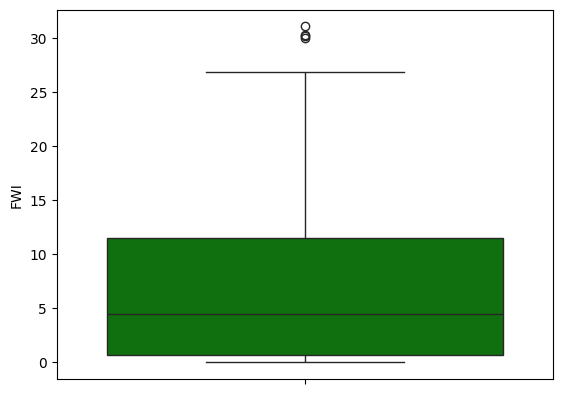

In [100]:
#boxplot
sns.boxplot(df["FWI"],color='g')

**Monthwise Fire Analysis**

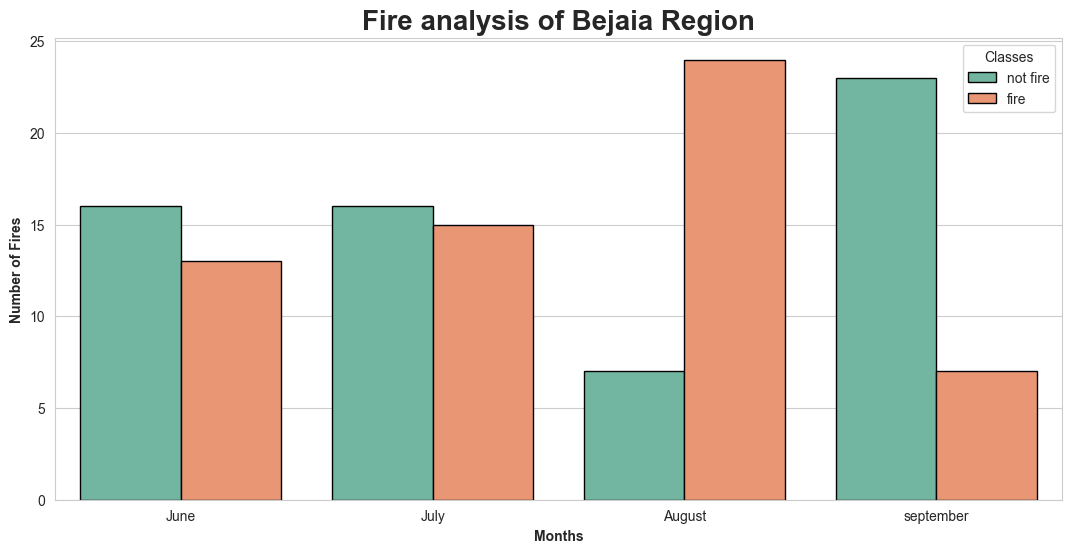

In [103]:
#fire analysis of Bejaia Region
dftemp = df.loc[df["Region"]==0]
plt.figure(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x = "month",hue = "Classes",data = dftemp,palette= 'Set2',ec = 'black' )
plt.xticks(np.arange(4),["June","July","August","september"])
plt.xlabel("Months",weight="bold")
plt.ylabel("Number of Fires",weight ="bold")
plt.title("Fire analysis of Bejaia Region",weight= "bold",fontsize=20)
plt.show()

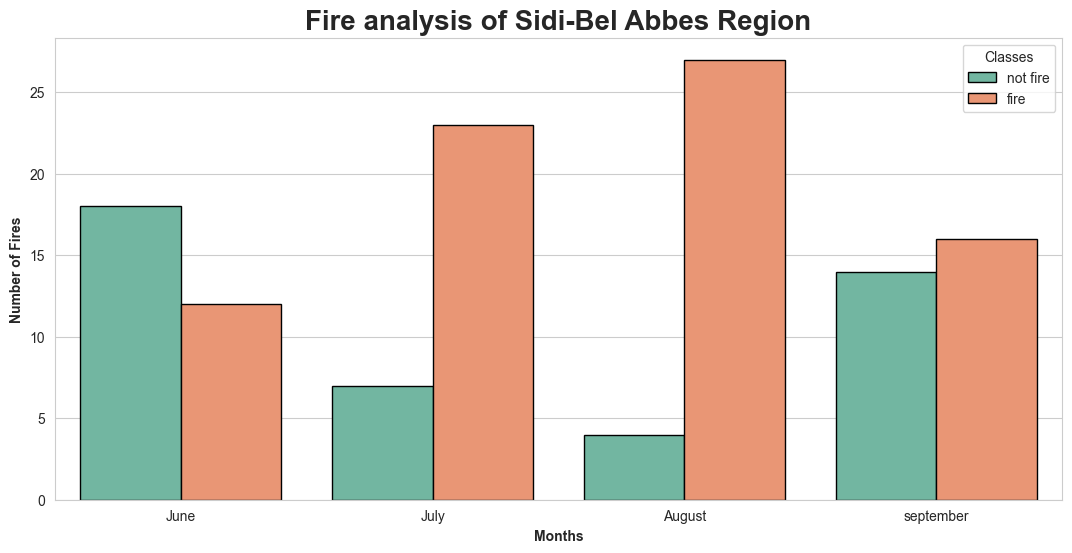

In [105]:
#fire analysis of Sidi-Bel Abbes Region
dftemp1 = df.loc[df["Region"]==1]
plt.figure(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x = "month",hue = "Classes",data = dftemp1,palette= 'Set2',ec = 'black' )
plt.xticks(np.arange(4),["June","July","August","september"])
plt.xlabel("Months",weight="bold")
plt.ylabel("Number of Fires",weight ="bold")
plt.title("Fire analysis of Sidi-Bel Abbes Region",weight= "bold",fontsize=20)
plt.show()

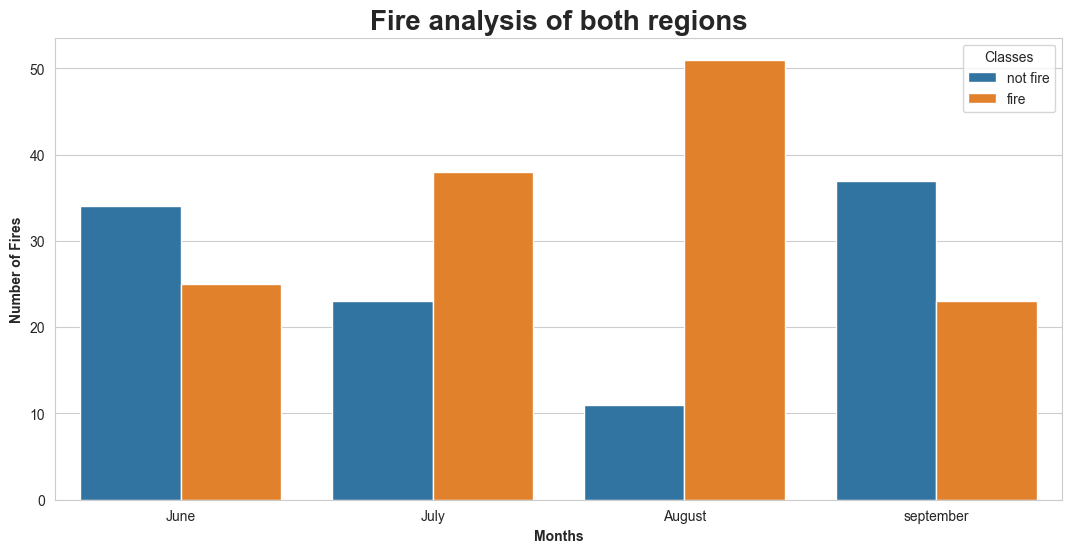

In [107]:
#Fire analysis of both regions combined
plt.figure(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x = "month",hue = "Classes",data = df)
plt.xticks(np.arange(4),["June","July","August","september"])
plt.xlabel("Months",weight="bold")
plt.ylabel("Number of Fires",weight ="bold")
plt.title("Fire analysis of both regions",weight= "bold",fontsize=20)
plt.show()

**Observations**

1. August has the highest number of fires for both Regions.
2. September has the least number of fires in Bejaia region and June has the least number of fires in Sidi-Bel Abbes region
3. When both regions combined June,July and August have the highest number of fires. Whereas there are fewer fires in September.   

In [110]:
#dropping unwanted features 
df.drop(["day","month","year"],axis=1,inplace=True)

In [112]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
1,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
2,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
3,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
4,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0


In [114]:
#categories in classes
df["Classes"].value_counts()

Classes
fire        137
not fire    105
Name: count, dtype: int64

In [116]:
#Encoding of the categories in classes to 0 and 1
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)

In [118]:
df["Classes"].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

**Correlation**

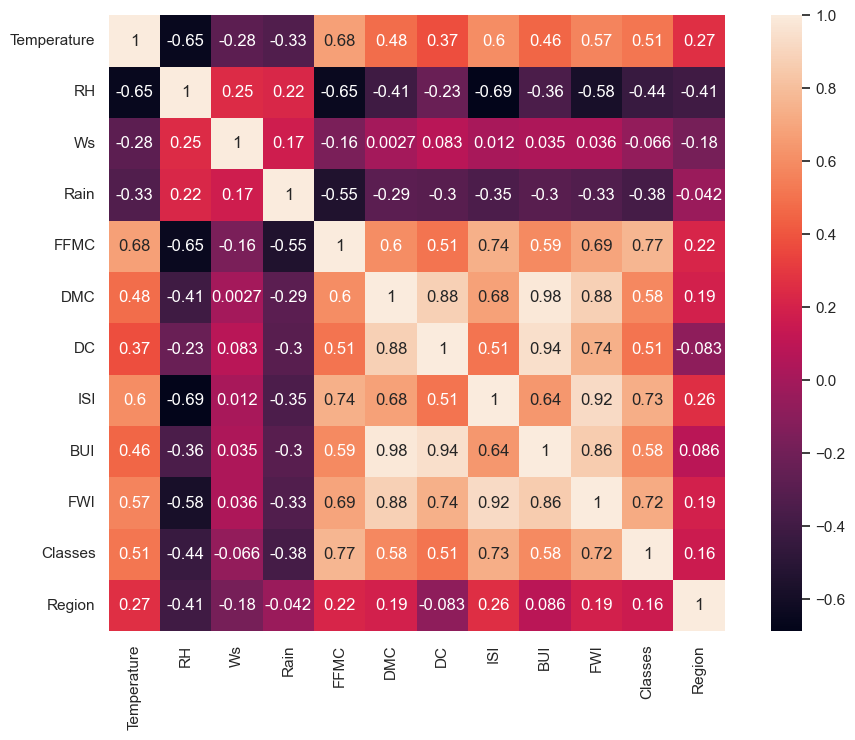

In [121]:
# Correlation chart
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
hm = sns.heatmap(df.corr(),annot=True, square=True)
plt.show()

**Visualization of Distribution**

In [126]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


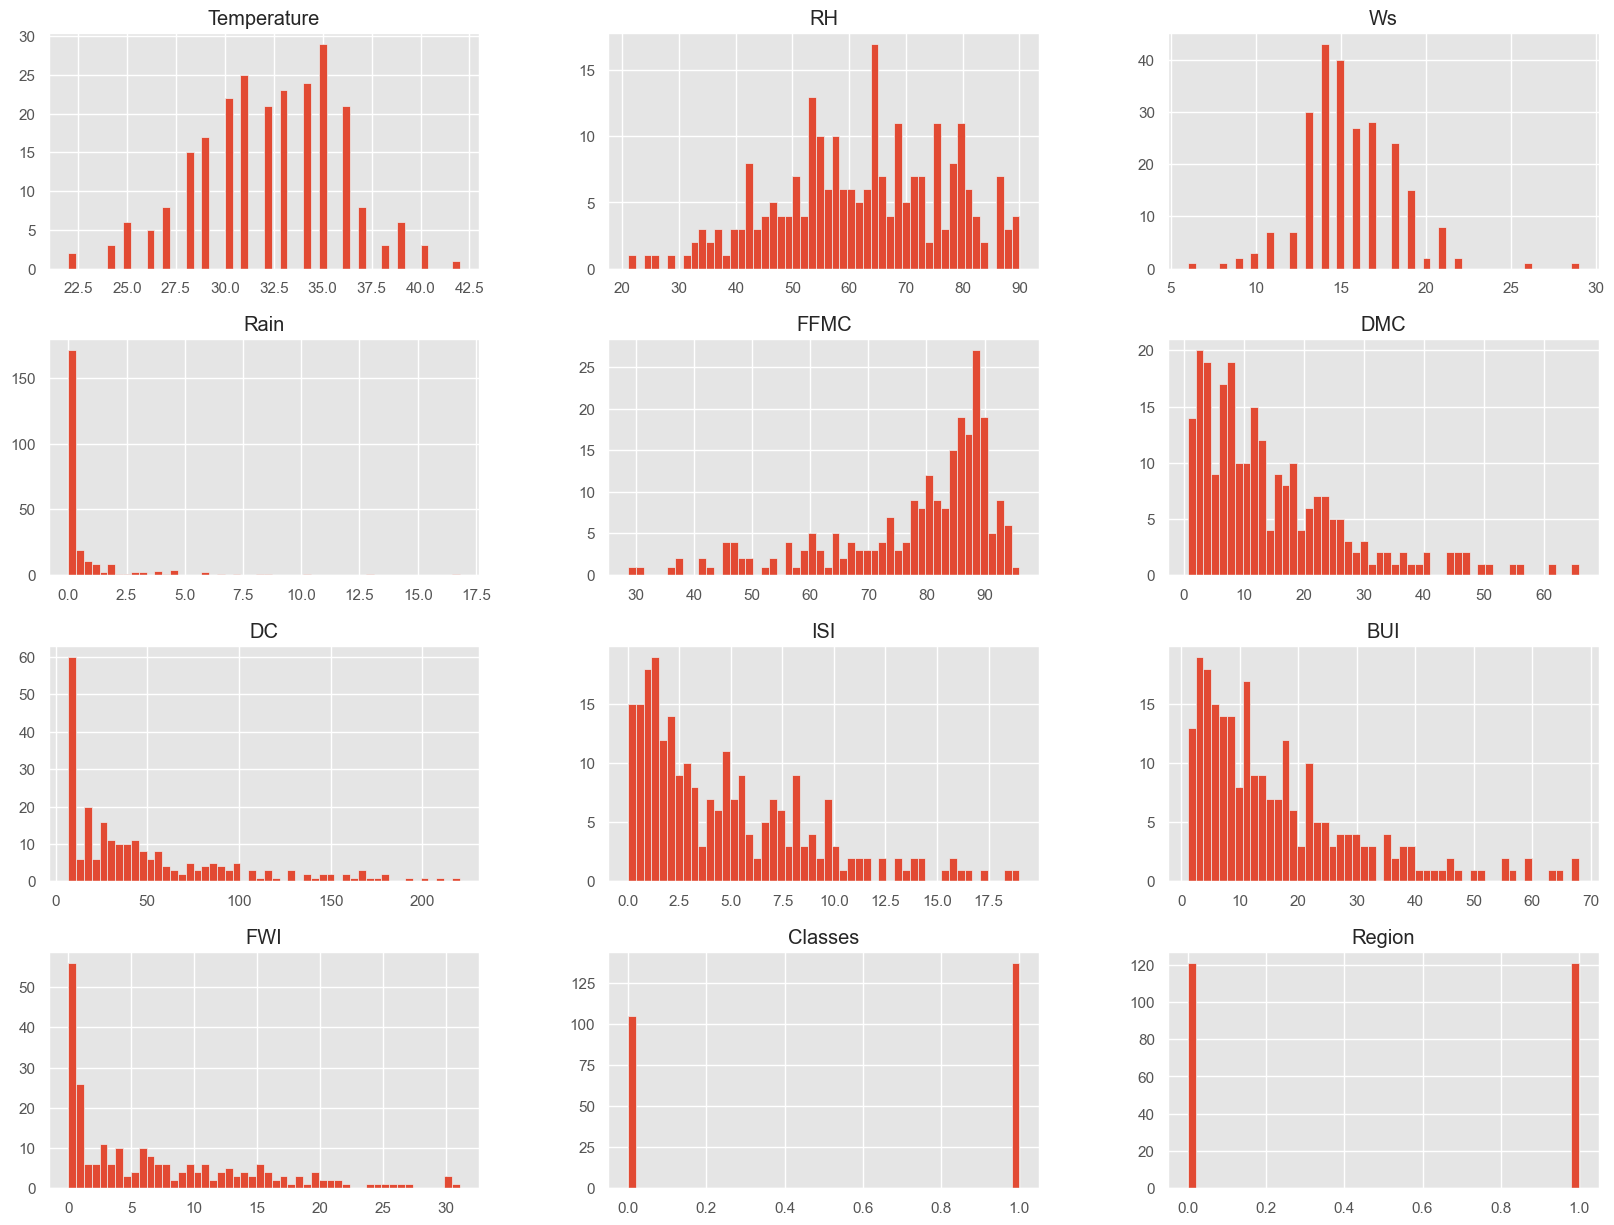

In [130]:
plt.style.use('ggplot')  # or any other available style
df.hist(bins=50, figsize=(20, 15))
plt.show()


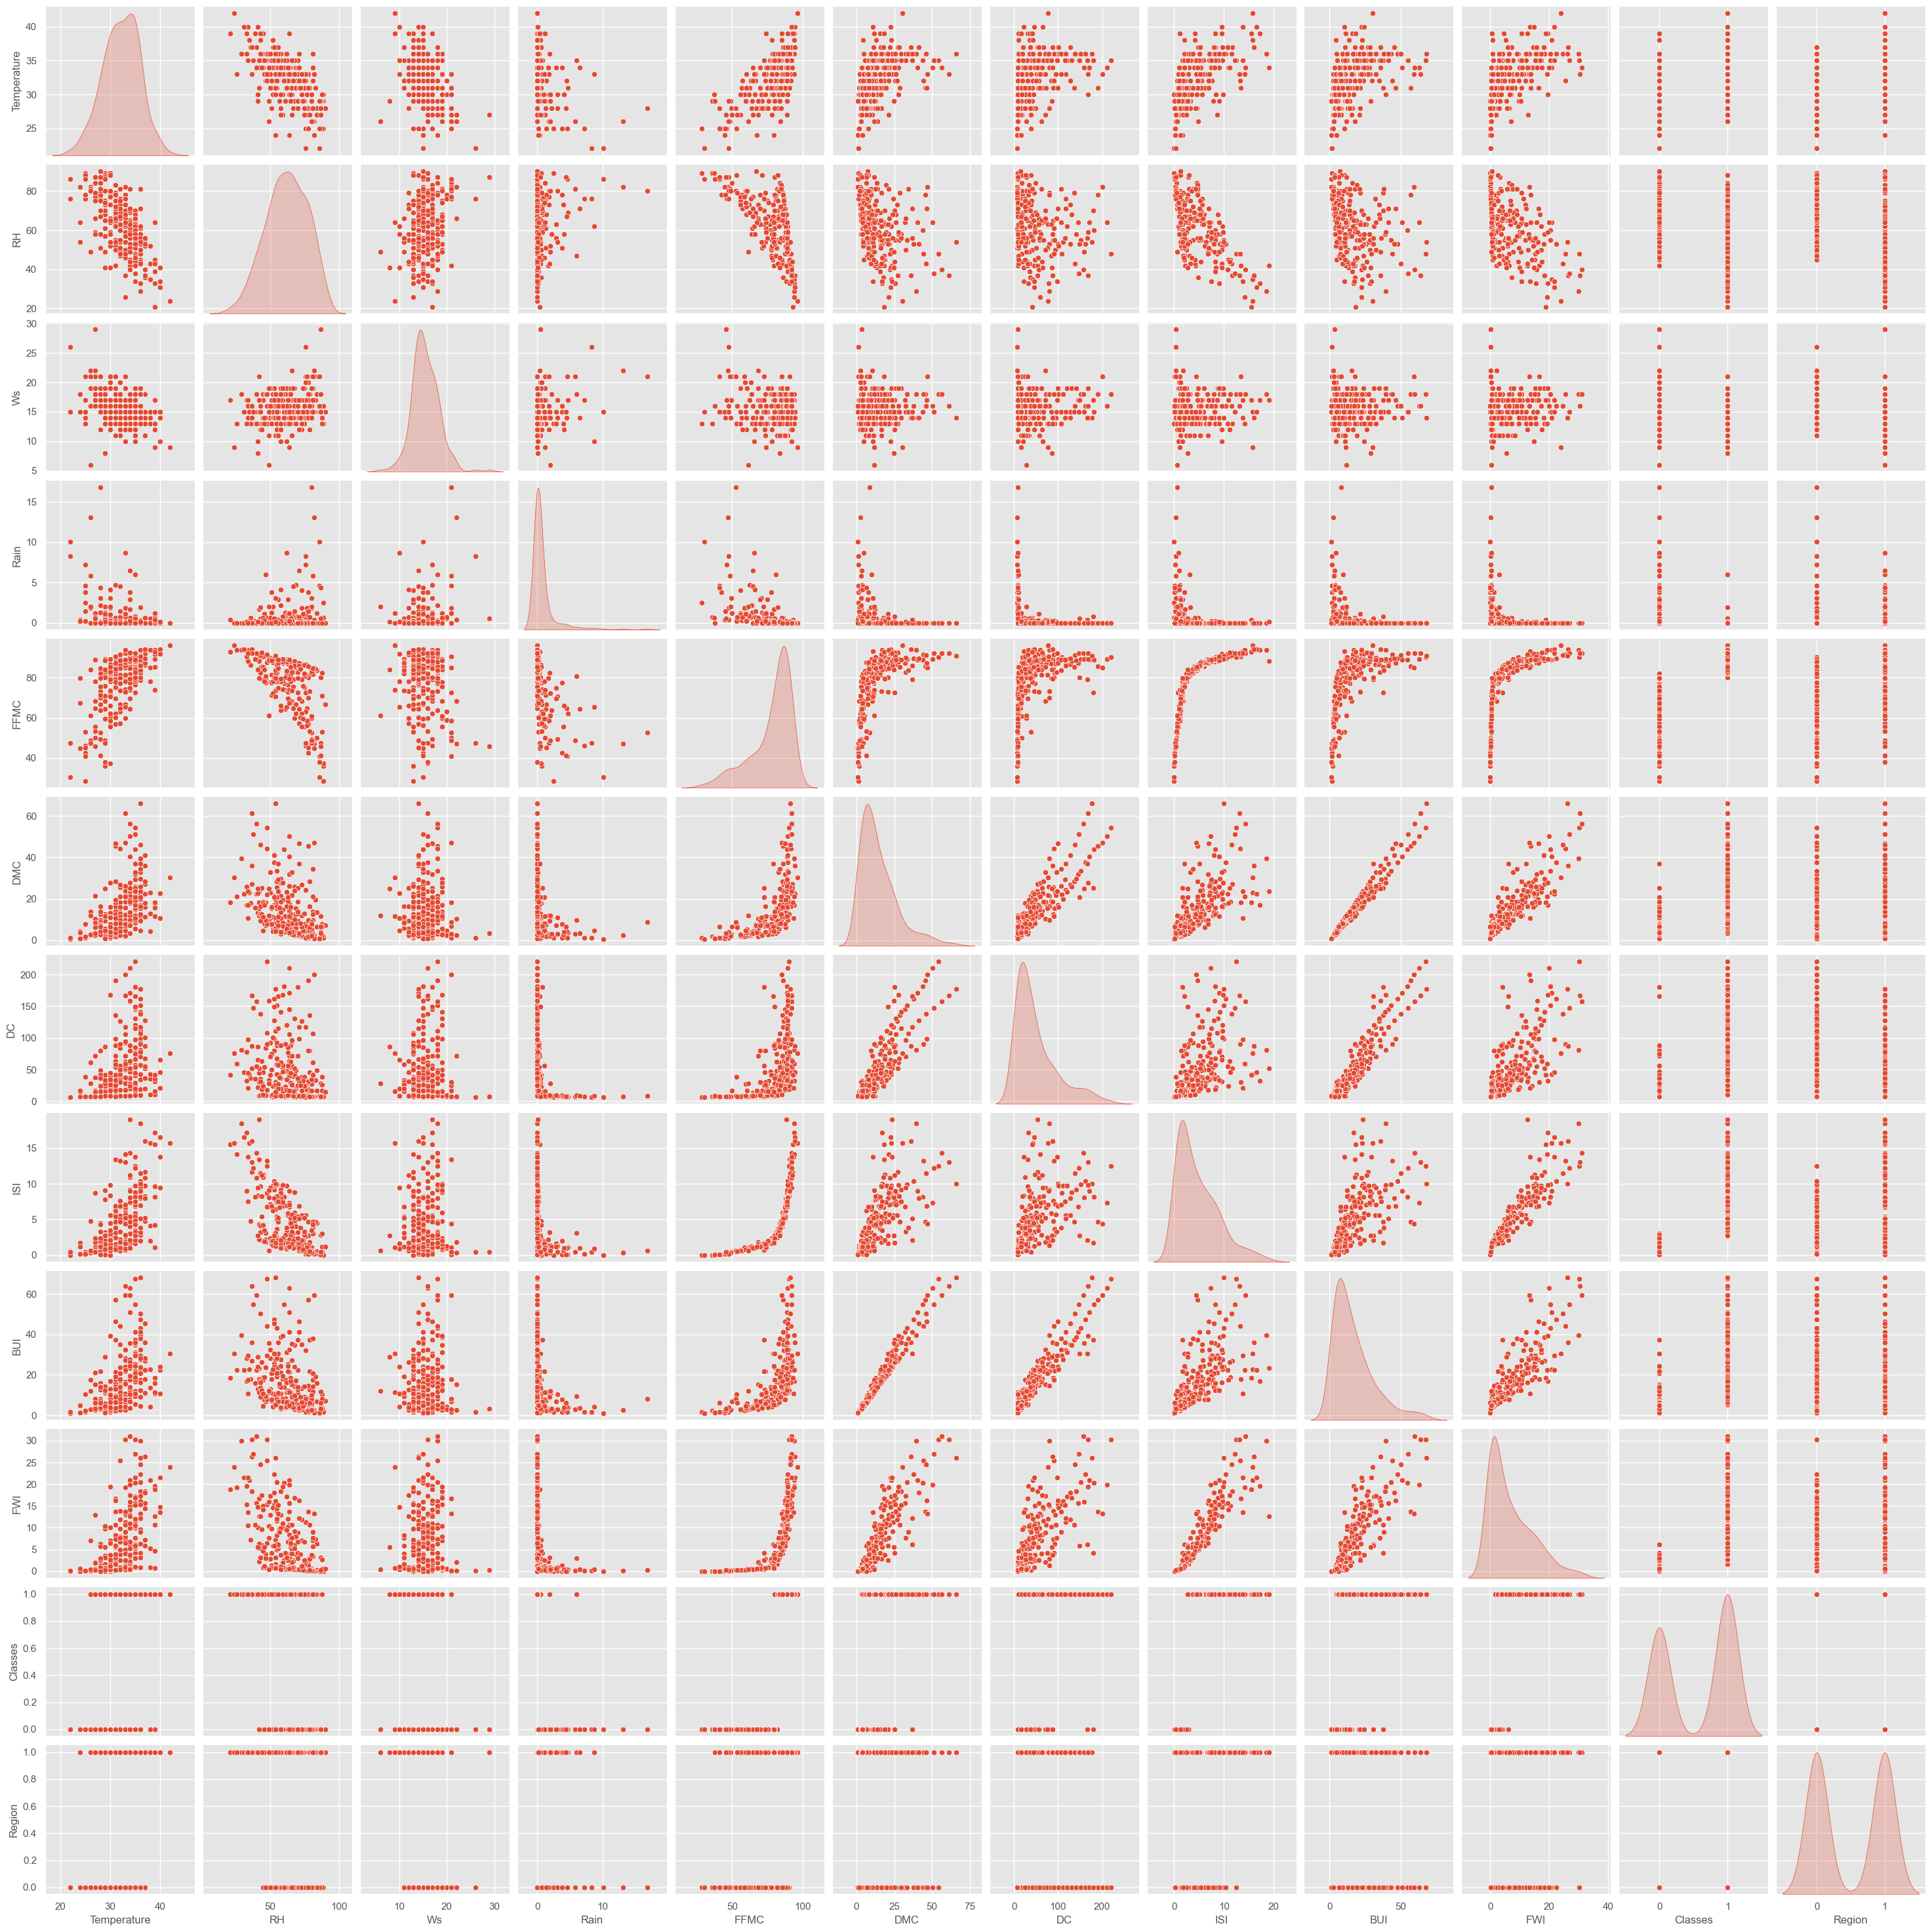

In [132]:
import seaborn as sns

# Pairplot for all features
sns.pairplot(df, diag_kind='kde')
plt.show()


**Charts**

In [135]:
#percentage for pie chart
percentage = df["Classes"].value_counts(normalize = True)*100
percentage

Classes
1    56.61157
0    43.38843
Name: proportion, dtype: float64

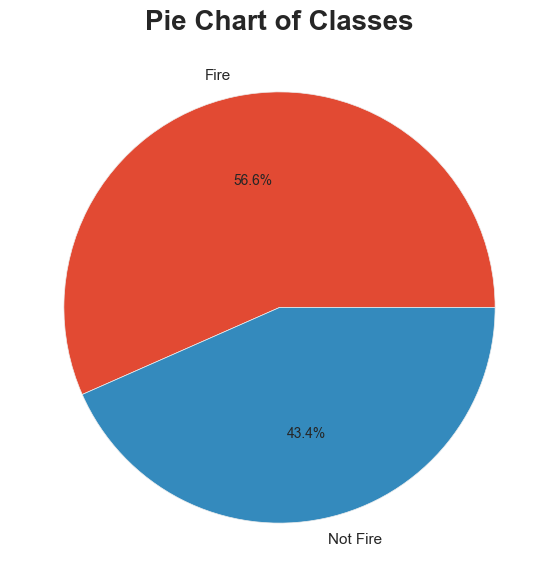

In [137]:
#plotting piechart
plt.figure(figsize=(12,7))
plt.pie(percentage,autopct="%1.1f%%",labels=["Fire","Not Fire"])
plt.title("Pie Chart of Classes",weight = "bold",fontsize = 20)
plt.show()

## Feature Engineering

In [140]:
#Independent and Dependent features
X = df.drop("FWI",axis = 1)
y  = df["FWI"]

In [142]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
1,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
2,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
3,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
4,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,1,0


In [144]:
y

0      0.4
1      0.1
2      0.0
3      0.5
4      2.5
      ... 
237    6.5
238    0.0
239    0.2
240    0.7
241    0.5
Name: FWI, Length: 242, dtype: float64

**Data Splitting**

In [147]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 42)

In [148]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((181, 11), (61, 11), (181,), (61,))

**Feature Selection**

In [152]:
#Feature selection based on Correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.647300,-0.274746,-0.345614,0.705055,0.492890,0.376148,0.628735,0.465267,0.545200,0.253777
RH,-0.647300,1.000000,0.231939,0.234878,-0.641884,-0.417732,-0.250138,-0.700552,-0.367746,-0.457546,-0.374339
Ws,-0.274746,0.231939,1.000000,0.182579,-0.120296,0.000381,0.100480,0.032940,0.037951,-0.030047,-0.249348
Rain,-0.345614,0.234878,0.182579,1.000000,-0.552525,-0.286043,-0.296688,-0.342808,-0.296684,-0.374895,-0.068452
FFMC,0.705055,-0.641884,-0.120296,-0.552525,1.000000,0.615820,0.533490,0.745063,0.605854,0.767070,0.209257
DMC,0.492890,-0.417732,0.000381,-0.286043,0.615820,1.000000,0.875484,0.692319,0.983266,0.621456,0.188130
DC,0.376148,-0.250138,0.100480,-0.296688,0.533490,0.875484,1.000000,0.552843,0.947023,0.555910,-0.091729
ISI,0.628735,-0.700552,0.032940,-0.342808,0.745063,0.692319,0.552843,1.000000,0.659996,0.757627,0.253274
BUI,0.465267,-0.367746,0.037951,-0.296684,0.605854,0.983266,0.947023,0.659996,1.000000,0.618737,0.086215
Classes,0.545200,-0.457546,-0.030047,-0.374895,0.767070,0.621456,0.555910,0.757627,0.618737,1.000000,0.160857


<Axes: >

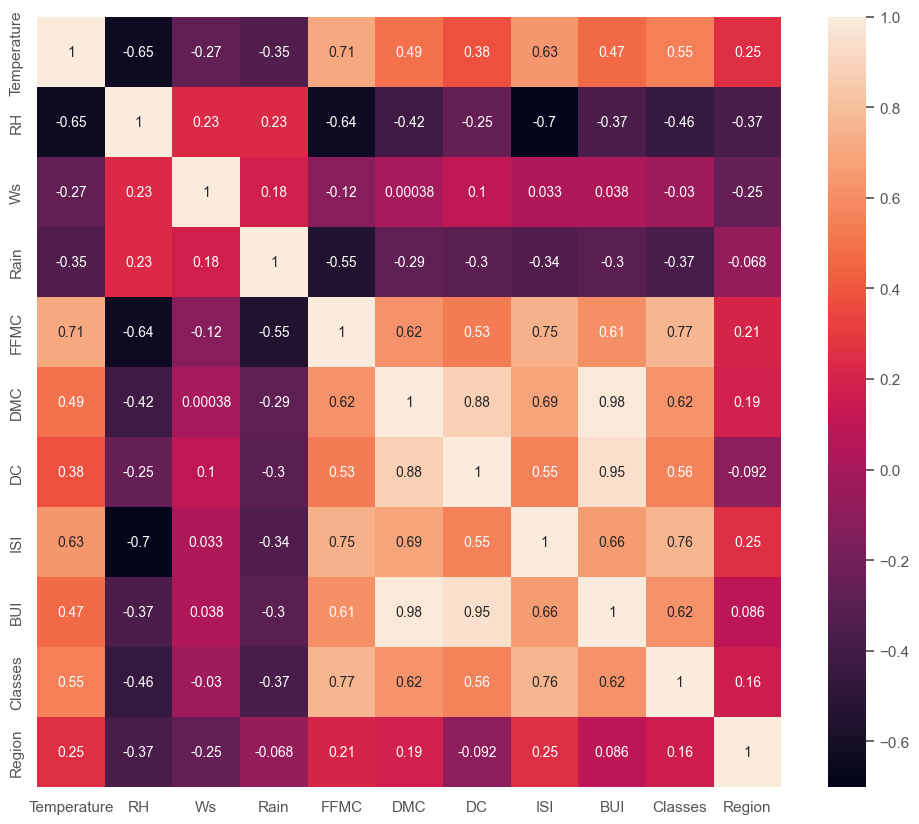

In [154]:
#Check for multicollinearity
plt.figure(figsize = (12,10))
sns.heatmap(X_train.corr(),annot = True)

In [156]:
def correlation(dataset,threshold):
    col_cor = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix)):
            if abs(corr_matrix.iloc[i,j])>threshold and abs(corr_matrix.iloc[i,j])!=1 :
                col_name  = corr_matrix.columns[i]
                col_cor.add(col_name)
    return col_cor

In [158]:
#threshold--Domain expertise
correlation(X_train,0.85)

{'BUI', 'DC', 'DMC'}

Here BUI,DC and DMC are highly correlated values. Dropping any two columns from idependent features with correlation values more than 0.85 in order to prevent from multicollinearity.

In [161]:
X_train.drop(["BUI","DC"],axis = 1,inplace = True)
X_test.drop(["BUI","DC"],axis = 1,inplace = True)
X_train.shape,X_test.shape

((181, 9), (61, 9))

**Feature Scaling or Standardization**

In [164]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [166]:
X_train_scaled

array([[-0.29050929,  0.53193789,  0.5690853 , ..., -0.75077165,
        -1.06273786, -0.99449032],
       [-0.02359466, -0.53933619, -0.52670661, ...,  0.07898034,
         0.94096582,  1.00554021],
       [-0.82433853, -1.47670101, -2.71829044, ..., -0.46628525,
         0.94096582,  1.00554021],
       ...,
       [-2.6927409 ,  1.53625733, -0.16144264, ..., -1.10637965,
        -1.06273786, -0.99449032],
       [ 1.04406383, -0.47238156,  0.20382133, ...,  0.83761073,
         0.94096582,  1.00554021],
       [-0.82433853,  1.67016659, -0.89197058, ..., -0.82189325,
        -1.06273786, -0.99449032]])

**Box Plots To understand Effect Of Standard Scaler**

Text(0.5, 1.0, 'X_train after scaling')

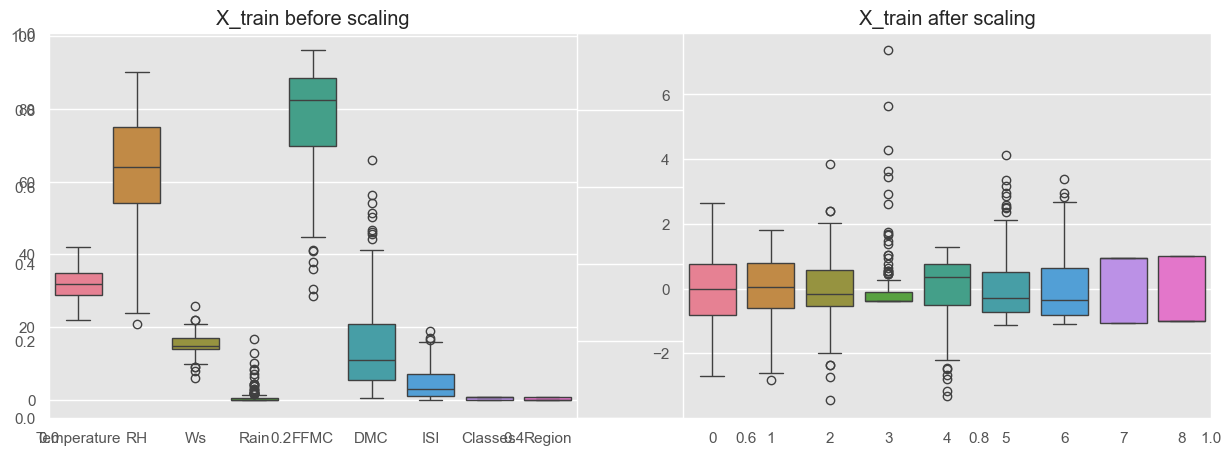

In [169]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")

## Model Development

**1. Linear Regression Model**

Mean Absolute Error 0.6006309656848243
R2 Score 0.9814013168526051


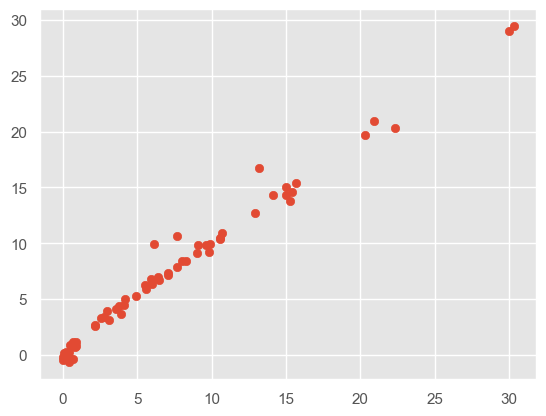

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
y_pred = lin_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

**2. Lasso Regression**

Mean Absolute Error 1.10798849250283
R2 Score 0.95186910166402


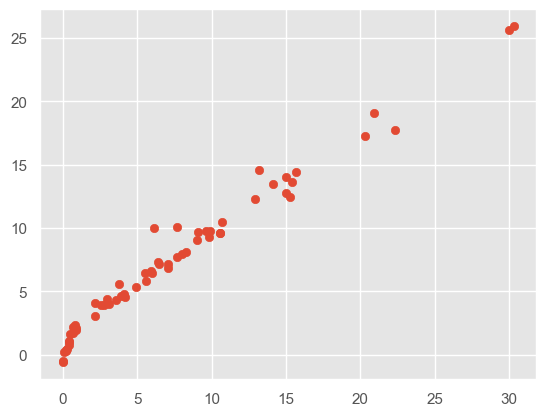

In [175]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

**Cross Validation Lasso**

Mean Absolute Error 0.6395314371548524
R2 Score 0.9807965383030857


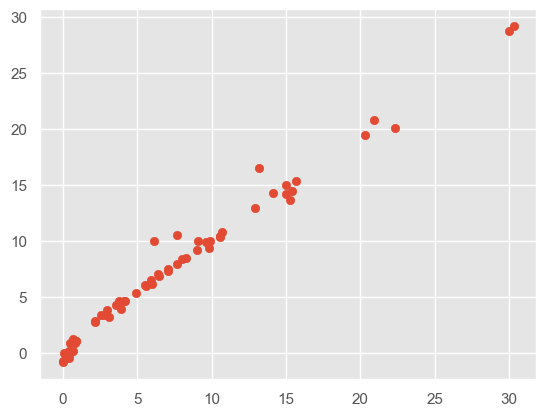

In [178]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

**3. Ridge Regression Model**

Mean absolute error 0.6316998441097735
R2 Score 0.9804468127120509


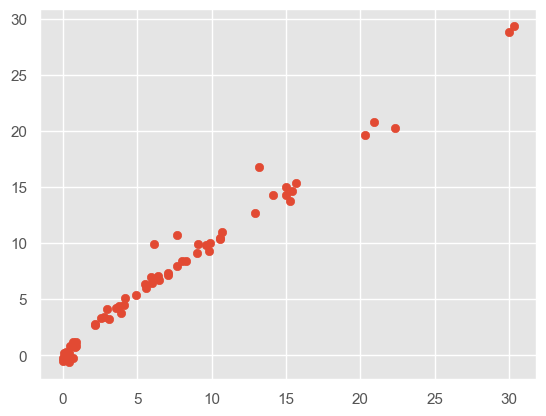

In [181]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

**Cross Validation Ridge**

Mean Absolute Score 0.8861617033920066
R2 Score 0.970351555178122


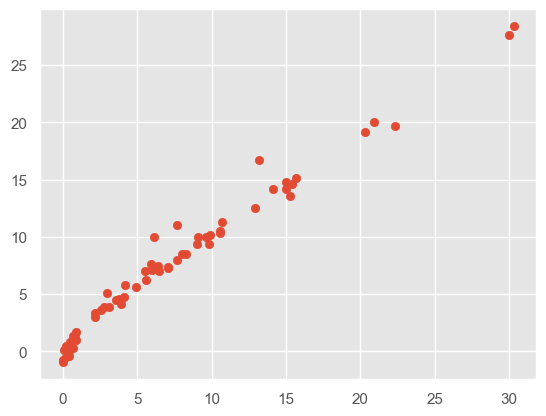

In [184]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Score",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

In [186]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

**4. Elasticnet Rigression**

Mean Absolute Score 1.8988576462936022
R2 Score 0.8715879544122654


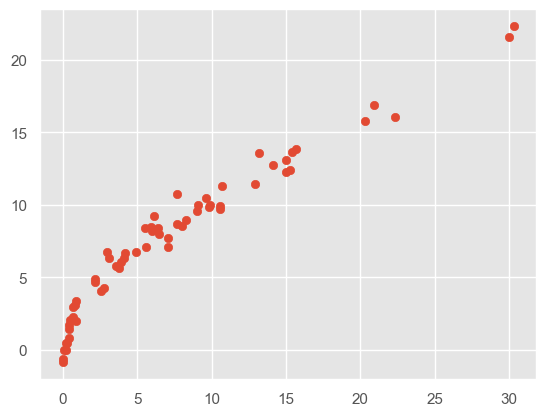

In [189]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Score",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

**Cross Validation Elasticnet Reression**

Mean Absolute Score 0.7318523837596466
R2 Score 0.9774021171930315


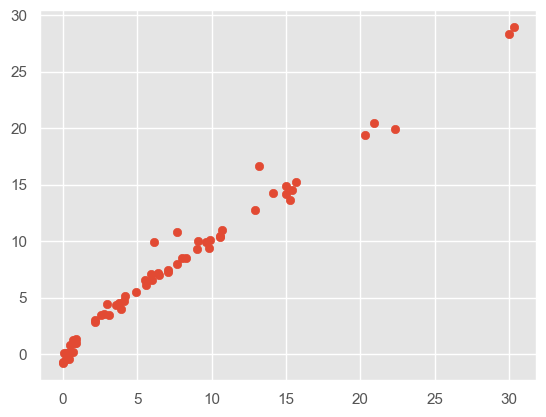

In [192]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticcv = ElasticNetCV()
elasticcv.fit(X_train_scaled,y_train)
y_pred = elasticcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Score",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

## Model Serialization

**Pickle the machine learning models,preprocessing model starndarscaler**

In [196]:
#considering ridge to pickle as ridge has good accuracy and zero cost function along with scaler as we need to scale the input data for prediction.
import pickle
pickle.dump(scaler,open("scaler.pkl",'wb'))
pickle.dump(ridge,open("ridge.pkl",'wb'))